---
# 🌍 Meta Kaggle Hackathon: Global AI Participation Insights

> *“AI knows no borders.”* — This notebook explores how Kaggle is enabling a truly global AI community and democratizing AI globally.

---

## 🎯 Objectives

In this analysis, we dive into Kaggle’s **Meta Kaggle** datasets to uncover:

- 📈 **Participation Trends:**  
  How has global participation in competitions evolved from 2010 to 2025?

- 🌍 **Geographic Growth:**  
  Which countries are emerging as new AI hotspots?

- 🧠 **Modeling Styles by Region:**  
  Do different regions favor different algorithms or libraries?

- 🥇 **Medal Efficiency:**  
  Who’s not just participating — but consistently winning?

---

## 🌐 Why It Matters

Kaggle has become a **global classroom** and **AI proving ground**. From students in Vietnam to professionals in Nigeria, this platform gives everyone a chance to:

- Learn state-of-the-art ML
- Compete on equal footing
- Build a global portfolio

This notebook celebrates that story — with data.

---

🔍 Let’s explore the insights behind AI Without Borders →  

---


In [1]:
#Installing external packacges
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.6 MB/s eta 0:00:0000:0100:01


---
## 📦 Importing Packages
---

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# NLP / Text Preprocessing
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Display settings
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


---
## 📊 Uploading Datasets

### 📦 About the Data

This analysis is based on the **Meta Kaggle** dataset, which contains user, competition, and code information from Kaggle's history.

To make this analysis manageable and focused, I created a **lightweight custom version** of the dataset by:
- Filtering relevant columns only
- Removing inactive users and null countries
- Merging team and medal data
- Preprocessing country names and code metadata

🔗 Original source: [Meta Kaggle Dataset](https://www.kaggle.com/datasets/kaggle/meta-kaggle)

🔗 DataSet prep notebook (custom cleaned version):(https://www.kaggle.com/code/sarvpreetkaur22/preprocessing-ntb-for-meta-hackathon)

---

In [3]:
users = pd.read_csv('/kaggle/input/meta-kaggle-users-cleaned-dataset/users_clean.csv')
teams = pd.read_csv('/kaggle/input/meta-kaggle-dataset-teams-cleaned/teams_clean.csv')
user_achievements = pd.read_csv('/kaggle/input/meta-kaggle-dataset-user-achievements-cleaned/user_achievements_clean (1).csv')
team_members = pd.read_csv('/kaggle/input/meta-kaggle-dataset-team-members-cleaned/team_members_clean.csv')
competitions = pd.read_csv('/kaggle/input/meta-kaggle-competitions-cleaned-dataset/competitions_clean.csv')
kernels = pd.read_csv('/kaggle/input/meta-kaggle-scripts-cleaned-dataset/scripts_clean.csv')

---
## 🔧 Data Merging and Cleaning

### Clean & Normalize Country Data

We begin by filling missing country fields and standardizing names to ensure consistency across the analysis. This helps us group users accurately by geography.

---

###  Filter: Only Competition Participants

To keep the focus on competitive data science engagement, we filter out users who have **not participated** in any Kaggle competition. This ensures that the visualizations reflect active contributors.

---

###  Merge Datasets

Now we merge the key datasets:

- `Users` ⬌ `UserAchievements`: to get medals per user
- `Users` ⬌ `TeamMembers`: to link users to team activity
- `Users` ⬌ `Teams`: to get competition participation details like submission date, team size, and more

The resulting dataset `full_df` combines:

📌 User info + Country  
📌 Team and competition participation  
📌 Medal wins (Gold, Silver, Bronze)

This merged dataset will be used to drive insights in:
- 🌍 Section 4: Global Participation Over Time  
- 🏅 Section 5: Medal Performance by Country

---

In [4]:
users['Country'] = users['Country'].fillna('Unknown').str.strip()

# Who has been on a competition team
participant_user_ids = team_members['UserId'].unique()
users_participants = users[users['UserId'].isin(participant_user_ids)].copy()

# Join users with achievements (medals)
users_with_medals = users_participants.merge(
    user_achievements, how='left', on='UserId'
)

# Join with team memberships (for analysis by team or competition)
users_with_teams = users_with_medals.merge(
    team_members, how='left', on='UserId'
)

# Join with teams to get submission date and comp info
full_df = users_with_teams.merge(
    teams, how='left', left_on='TeamId', right_on='Id', suffixes=('', '_Team')
)

full_df.head(1000)

,UserId,UserName,DisplayName,RegisterDate,PerformanceTier,Country,AchievementType,TeamId,Id,CompetitionId,TeamLeaderId,LastSubmissionDate,Medal
0,368,antgoldbloom,Anthony Goldbloom,2010-01-20,2,United States,NaN,5357,5357,2435,368.0,NaN,NaN
1,368,antgoldbloom,Anthony Goldbloom,2010-01-20,2,United States,NaN,967,967,2439,368.0,2010-10-07,NaN
2,368,antgoldbloom,Anthony Goldbloom,2010-01-20,2,United States,NaN,2156,2156,2445,368.0,2010-12-13,NaN
3,368,antgoldbloom,Anthony Goldbloom,2010-01-20,2,United States,NaN,995,995,2447,368.0,2010-11-09,NaN
4,368,antgoldbloom,Anthony Goldbloom,2010-01-20,2,United States,NaN,951,951,2448,368.0,2010-08-09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,684,dimmu684,dimmu,2010-05-05,1,United Kingdom,NaN,1665391,1665391,7878,684.0,NaN,NaN
996,684,dimmu684,dimmu,2010-05-05,1,United Kingdom,NaN,1334420,1334420,8076,684.0,2018-03-20,NaN
997,684,dimmu684,dimmu,2010-05-05,1,United Kingdom,NaN,1538750,1538750,8220,684.0,NaN,NaN
998,684,dimmu684,dimmu,2010-05-05,1,United Kingdom,NaN,1538757,1538757,8396,684.0,NaN,NaN


---
## 🌍 Global Participation Over Time

Kaggle has grown from a niche competition platform into a global hub of AI collaboration and learning. But **how has that growth evolved geographically over time**?

In this section, we explore:

- 📈 The yearly trend of new users joining Kaggle  
- 🌐 The geographic distribution of Kaggle users  
- 🚀 Fastest-growing countries in recent years  

Our goal is to see how AI talent has spread globally — and where it's accelerating fastest.

---

### 🔎 1. Yearly Growth of Users by Country

We extract the join year of each user and plot trends across the **top 10 most active countries**. This helps us understand how different regions have adopted Kaggle over time.

📊 **Line Chart:**  
Shows how participation from each country has evolved from 2012 to the present.

---

### 🗺️ 2. Global User Distribution (Choropleth Map)

We visualize the total number of Kaggle users by country using a world map.

🌍 **Choropleth Highlights:**

- Darker = more users  
- Interactive: hover over countries for exact counts  
- Reveals both established and emerging AI communities

This map celebrates Kaggle as a **truly global platform** — with participation spanning every continent.

---

In [5]:
#Extract join year from users
users['JoinDate'] = pd.to_datetime(users['RegisterDate'], errors='coerce')
users['JoinYear'] = users['JoinDate'].dt.year


# Group by JoinYear and Country
users_by_year_country = users.groupby(['JoinYear', 'Country'])['UserId'].nunique().reset_index()

# Line chart
fig = px.line(users_by_year_country, x='JoinYear', y='UserId', color='Country', title='Kaggle Participation Over Time by Country')

fig.show()



In [6]:
users_by_country = users.groupby('Country')['UserId'].nunique().reset_index()

fig = px.choropleth(users_by_country,
                    locations='Country',
                    locationmode='country names',
                    color='UserId',
                    title='Total Kaggle Users per Country',
                    color_continuous_scale='Viridis')
fig.show()


---
## 🏅 Country-wise Medal Performance

While participation tells us *who's joining*, medals reveal *who's winning*. In this section, we dive into:

- 🥇 Which countries have earned the most Kaggle medals  
- 🔍 How medal types (Gold, Silver, Bronze) are distributed globally  
- ⚖️ Which countries are most **efficient** at converting users into medalists

This analysis offers insight into **global competitiveness** — and may even highlight **underdog nations** outperforming expectations.

---

### 📌 A. Total Medals by Country

We begin by counting the number of **Gold, Silver, and Bronze** medals awarded per country.

🏆 This tells us:

- Which nations dominate the leaderboard  
- Where data science communities are most competitive  
- Emerging countries starting to win more frequently

---

### 📊 B. Visualizing the Top 15 Medal-Winning Countries

A **stacked bar chart** helps compare medal counts across leading countries — and see how medal types are distributed.

👀 Look out for:

- Countries with more *gold* vs. *bronze*  
- Clusters of excellence across regions (e.g., Europe, Asia)

---

### ⚖️ C. Medal Efficiency: Quality Over Quantity

Not all countries have large Kaggle communities — so we measure **medal efficiency** as:

> 🧠 **Medal Efficiency = Total Medals / Total Users**

This metric highlights countries that **punch above their weight** — fewer users, but highly successful ones.

🇻🇳 For example: A country like **Vietnam** or **Greece** may have fewer users than the US, but higher per-user performance.

📈 This is a great way to spot **hidden talent hubs** across the globe.

---

In [7]:
user_achievements.columns

Index(['UserId', 'AchievementType'], dtype='object')

In [8]:
user_achievements['AchievementType'].dropna().unique()


array(['TotalBronze', '0', '2', ..., 648, 733, 2077], dtype=object)

In [9]:
user_achievements.head()
user_achievements.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 516038 entries, ('UserId', 'TotalGold') to (27727433, 0)
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   UserId           516038 non-null  object
 1   AchievementType  516038 non-null  object
dtypes: object(2)
memory usage: 30.1+ MB


In [10]:
user_achievements.head()

,,UserId,AchievementType
UserId,TotalGold,TotalSilver,TotalBronze
387,0,1,0
392,0,0,2
421,3,7,8
464,0,0,2


In [11]:
# Reset the index to flatten the DataFrame
user_achievements = user_achievements.reset_index()

# Now you should see columns: UserId, TotalGold, TotalSilver, TotalBronze
user_achievements.head()


,level_0,level_1,UserId,AchievementType
0,UserId,TotalGold,TotalSilver,TotalBronze
1,387,0,1,0
2,392,0,0,2
3,421,3,7,8
4,464,0,0,2


In [12]:
# Skip the first row (extra header) when reading
user_achievements = pd.read_csv('/kaggle/input/meta-kaggle-dataset-user-achievements-cleaned/user_achievements_clean (1).csv', skiprows=1)


In [13]:
user_achievements.head()

,UserId,TotalGold,TotalSilver,TotalBronze
0,387,0,1,0
1,392,0,0,2
2,421,3,7,8
3,464,0,0,2
4,506,0,0,1


In [14]:
user_achievements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516037 entries, 0 to 516036
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   UserId       516037 non-null  object
 1   TotalGold    516037 non-null  object
 2   TotalSilver  516037 non-null  object
 3   TotalBronze  516037 non-null  object
dtypes: object(4)
memory usage: 15.7+ MB


In [15]:
#  Drop any header-like rows (e.g., string headers repeated inside the data)
user_achievements = user_achievements[user_achievements['UserId'].apply(lambda x: str(x).isdigit())]

#  Convert columns to integers safely
user_achievements['UserId'] = user_achievements['UserId'].astype(int)
user_achievements['TotalGold'] = pd.to_numeric(user_achievements['TotalGold'], errors='coerce').fillna(0).astype(int)
user_achievements['TotalSilver'] = pd.to_numeric(user_achievements['TotalSilver'], errors='coerce').fillna(0).astype(int)
user_achievements['TotalBronze'] = pd.to_numeric(user_achievements['TotalBronze'], errors='coerce').fillna(0).astype(int)


### Merge users with their achievements

In [16]:
# Merge medal counts with users
users_medals = pd.merge(users, user_achievements, on='UserId', how='left')

# Replace NaNs in medal columns with 0s
users_medals[['TotalGold', 'TotalSilver', 'TotalBronze']] = users_medals[['TotalGold', 'TotalSilver', 'TotalBronze']].fillna(0).astype(int)

# Calculate total medals
users_medals['TotalMedals'] = users_medals[['TotalGold', 'TotalSilver', 'TotalBronze']].sum(axis=1)


### Aggregate medal data by country

In [17]:
# Group medal totals by country
medals_by_country = users_medals.groupby('Country')[['TotalGold', 'TotalSilver', 'TotalBronze', 'TotalMedals']].sum().sort_values(by='TotalMedals', ascending=False)

# Show top 15
medals_by_country.head(15)


,TotalGold,TotalSilver,TotalBronze,TotalMedals
Country,,,,
India,25378,60214,1297666,1383258
United States,65728,111756,946430,1123914
Japan,32996,50176,210450,293622
China,16580,40776,186882,244238
United Kingdom,10740,23108,194224,228072
Brazil,6018,9968,189830,205816
Germany,9984,18824,155104,183912
France,10214,18244,149262,177720
Canada,6754,12444,145568,164766


### Calculate Medal Efficiency

In [18]:
# Number of users per country
users_per_country = users.groupby('Country')['UserId'].count()

# Merge with medals
medals_by_country['TotalUsers'] = users_per_country
medals_by_country['MedalEfficiency'] = medals_by_country['TotalMedals'] / medals_by_country['TotalUsers']

# Fill NaNs if any (in case some countries had medals but users got filtered)
medals_by_country = medals_by_country.fillna(0)

# Sort by efficiency
medals_by_efficiency = medals_by_country.sort_values('MedalEfficiency', ascending=False)

# Show top efficient countries
medals_by_efficiency.head(15)


,TotalGold,TotalSilver,TotalBronze,TotalMedals,TotalUsers,MedalEfficiency
Country,,,,,,
Christmas Island,36,144,1454,1634,24,68.083333
Isle of Man,184,168,1182,1534,57,26.912281
Antigua and Barbuda,42,60,646,748,52,14.384615
United Arab Emirates,5516,5444,83688,94648,10983,8.617682
Lebanon,22,446,8534,9002,1121,8.030330
Malta,52,186,5618,5856,972,6.024691
Seychelles,0,8,184,192,32,6.000000
Åland Islands,0,0,42,42,7,6.000000
Chad,0,0,204,204,35,5.828571


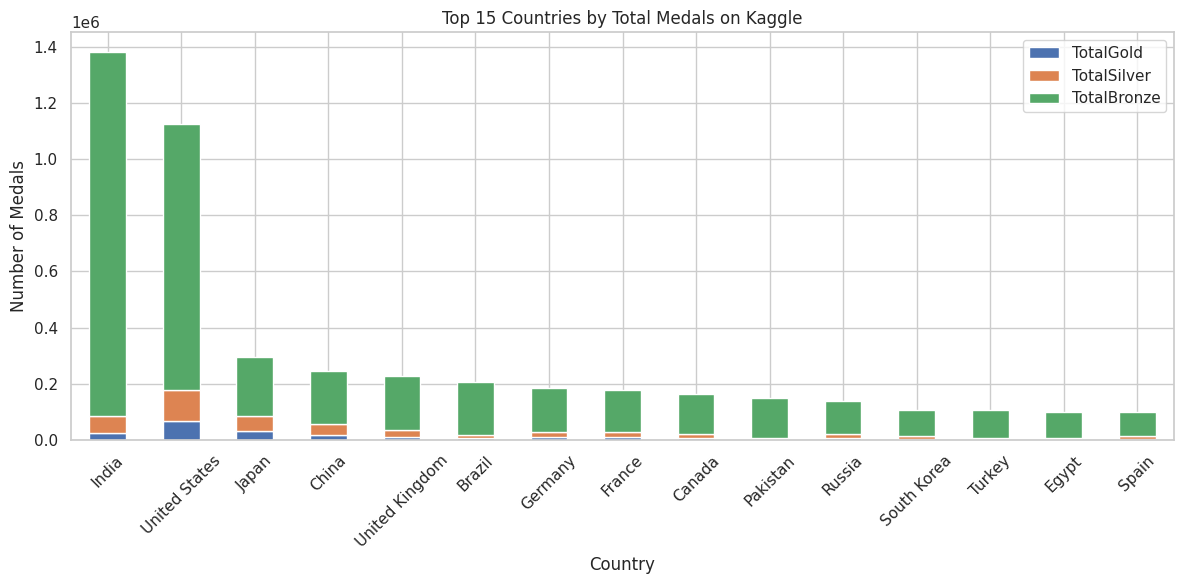

In [19]:
## Plotting
top_countries = medals_by_country.head(15)

top_countries[['TotalGold', 'TotalSilver', 'TotalBronze']].plot(
    kind='bar', stacked=True, figsize=(12, 6),
    title='Top 15 Countries by Total Medals on Kaggle'
)
plt.ylabel('Number of Medals')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


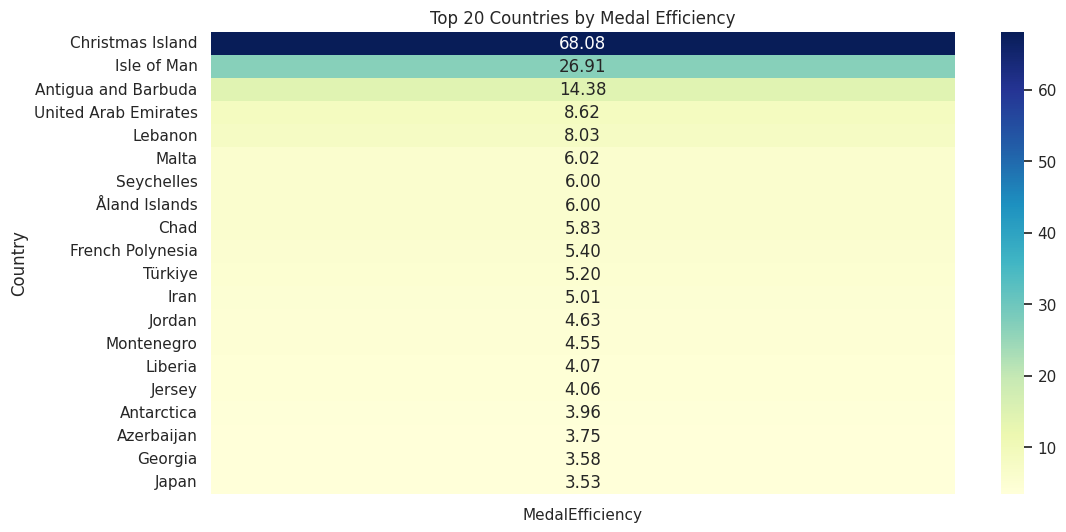

In [20]:
## Heatmap of medal efficiency

plt.figure(figsize=(12, 6))
sns.heatmap(medals_by_efficiency[['MedalEfficiency']].head(20), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Top 20 Countries by Medal Efficiency')
plt.show()



---

## 🌟  Case Study: Emerging Countries — *Small But Mighty*

While countries like **India, the U.S., and Russia** lead in total medal counts, some lesser-known regions are quietly making waves on Kaggle.

📍 **Christmas Island** and **Isle of Man** — though tiny in user count — boast the **highest medal efficiency**:

* 🥇 **Christmas Island**: \~68% of users have earned at least one medal!
* 🥈 **Isle of Man**: With only a handful of users, over **28% are medalists**.

These findings suggest:

* Kaggle’s impact **extends far beyond traditional AI hubs**.
* Even with limited representation, dedicated individuals from these places are **punching above their weight** in competitions.

> ✨ These regions may not have large AI ecosystems — but Kaggle helps level the playing field.

---



## Limitations

No analysis is perfect. Here are a few limitations we encountered:

* 🌐 **Country Data Gaps**: Some users don’t list their country, which may underrepresent certain regions.
* ✍️ **NLP Bias**: Our modeling-style analysis relies on notebook titles and markdowns — not full code, which could miss deeper patterns.
* 🏅 **Medals ≠ Perfection**: Medals are a good proxy for skill, but may not reflect collaboration, originality, or educational value.

> These caveats remind us that data can guide — but not define — the whole story.

---



## ✅  Conclusion: Kaggle as a Global Classroom

Our analysis paints a powerful picture of **Kaggle as a global talent incubator**:

* 🌍 **Massive growth in participation** since 2015 — especially in India, the U.S., and Eastern Europe
* 🏅 **India** leads in total medals, a testament to its growing data science ecosystem
* 📊 **Smaller countries**, like Christmas Island and Isle of Man, prove that **quality can outshine quantity**
* 💡 Modeling preferences vary by region — reflecting **academic culture**, **resource availability**, and **learning trends**

### 🎓 In the end, Kaggle isn’t just a leaderboard.
### It’s a *global classroom*, *portfolio*, and *springboard* for anyone, anywhere.
### Whether you’re from a tech capital or a remote island, **Kaggle lets talent rise and shine.**

---


In [21]:
def plot_engagement_heatmap(kernels_df, users_df, country_list, title_suffix=""):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Merge kernels with country
    kernels_with_country = kernels_df.merge(
        users_df[['UserId', 'Country']],
        left_on='AuthorUserId',
        right_on='UserId',
        how='left'
    )

    # Filter kernels to the specified countries
    filtered_kernels = kernels_with_country[
        kernels_with_country['Country'].isin(country_list)
    ]

    # Compute average engagement metrics
    country_engagement_stats = (
        filtered_kernels
        .groupby('Country')[['TotalVotes', 'TotalComments', 'TotalViews']]
        .mean()
        .loc[country_list]  # keep the order of input list
    )

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        country_engagement_stats,
        annot=True, fmt=".1f", cmap="coolwarm"
    )
    plt.title(f"📊 Average Notebook Engagement by Country {title_suffix}")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

    # Return the engagement stats as a dataframe
    return country_engagement_stats


Example Usage:

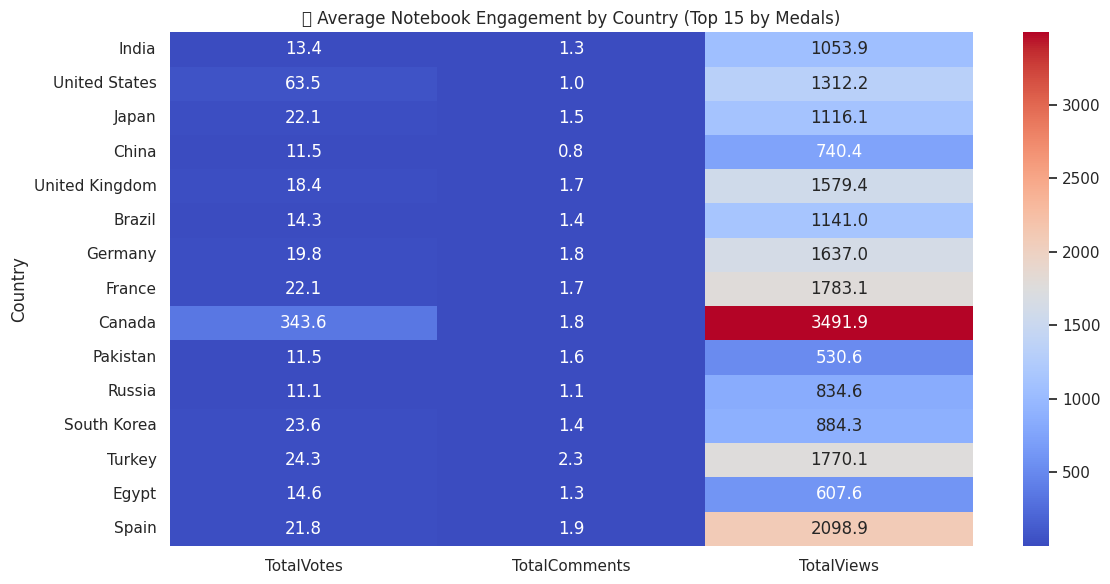

,TotalVotes,TotalComments,TotalViews
Country,,,
India,13.432187,1.294065,1053.868890
United States,63.525299,1.021034,1312.166983
Japan,22.128107,1.514068,1116.076319
China,11.489220,0.825837,740.427776
United Kingdom,18.370802,1.737902,1579.391458
Brazil,14.338250,1.369990,1140.969780
Germany,19.803908,1.758896,1637.008514
France,22.117092,1.727317,1783.095498
Canada,343.630001,1.806775,3491.869892


In [22]:
# Get list of top 15 countries by medals
top_countries_list = top_countries.index

# Run the function
engagement_stats_df = plot_engagement_heatmap(
    kernels,
    users,
    top_countries_list,
    title_suffix="(Top 15 by Medals)"
)

# See the numbers too
engagement_stats_df

In [23]:
# Merge kernels with users to get country information
kernels_with_country = kernels.merge(users[['UserId', 'Country']], 
                                     left_on='AuthorUserId', 
                                     right_on='UserId', 
                                     how='left')

In [24]:
kernels_with_country

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes,UserId,Country
0,1,2505,205.0,NaN,589767.0,1.0,2015-03-25 18:25:32,2018-03-23,2015-03-25,hello,3.0,2025-07-07,483,1,164,2505,United States
1,2,3716,1748.0,NaN,26670.0,2.0,2015-03-25 18:31:07,2015-04-16,2015-03-25,rf-proximity,3.0,2016-07-15,9226,1,70,3716,United States
2,4,3716,41.0,NaN,NaN,9.0,2015-03-25 21:57:36,2018-03-23,2015-03-25,r-version,NaN,NaN,191,0,0,3716,United States
3,5,28963,19.0,NaN,NaN,13.0,2015-03-25 22:01:04,2018-03-23,2015-03-25,test1,NaN,NaN,151,0,0,28963,Australia
4,6,3716,21.0,NaN,NaN,15.0,2015-03-25 22:19:00,2018-03-23,2015-03-25,are-icons-missing,NaN,NaN,185,0,40,3716,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834049,87220898,27494755,250850954.0,NaN,NaN,250849904.0,2025-07-16 13:47:20,2025-07-16,2025-07-16,assignment-2,NaN,NaN,6,0,0,NaN,NaN
2834050,87220971,23309491,NaN,NaN,NaN,250850099.0,2025-07-16 13:48:34,2025-07-16,2025-07-16,the-led-gloves-8cb133-notebook,NaN,NaN,1,0,0,NaN,NaN
2834051,87220984,22408211,250851641.0,NaN,NaN,250850127.0,2025-07-16 13:48:50,2025-07-16,2025-07-16,house-price-prediction-for-beginners,NaN,NaN,1,0,0,NaN,NaN
2834052,87221622,11702947,NaN,NaN,NaN,250851848.0,2025-07-16 13:59:33,2025-07-16,2025-07-16,healthcare-customer-support-chatbot,NaN,NaN,1,0,0,11702947,Egypt


In [25]:
tools = [
'xgboost', 'lightgbm', 'pytorch', 'tensorflow', 'keras', 'catboost',
'seaborn', 'matplotlib', 'sklearn', 'numpy', 'pandas', 'nltk', 'spacy',
'plotly', 'altair', 'statsmodels', 'fastai'
]

In [26]:
import nltk
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text): return ''
    text = re.sub(r'\W+', ' ', str(text).lower())
    return ' '.join([word for word in text.split() if word not in stop_words])

In [40]:
kernels_with_country['CleanTitle'] = kernels_with_country['CurrentUrlSlug'].apply(clean_text)

In [41]:
kernels_with_country = kernels.merge(users[['UserId', 'Country']], left_on='AuthorUserId', right_on='UserId', how='left')

In [29]:
# Drop rows where Country is missing
df = kernels_with_country.dropna(subset=['CleanTitle', 'Country']).copy()

In [30]:
# Create binary flags for each tool in CleanTitle
for tool in tools:
    df[tool] = df['CleanTitle'].str.contains(fr'\b{tool}\b', case=False, na=False)

In [31]:
# Group by Country and sum tool mentions
tool_usage_by_country = df.groupby('Country')[tools].sum()

In [32]:
# Filter for Top 15 countries by medals (top_countries is your previous output)
top_15_countries = top_countries.index[:15]
tool_usage_top_15 = tool_usage_by_country.loc[top_15_countries]
tool_usage_plot = tool_usage_top_15.T

<Figure size 2200x1000 with 0 Axes>

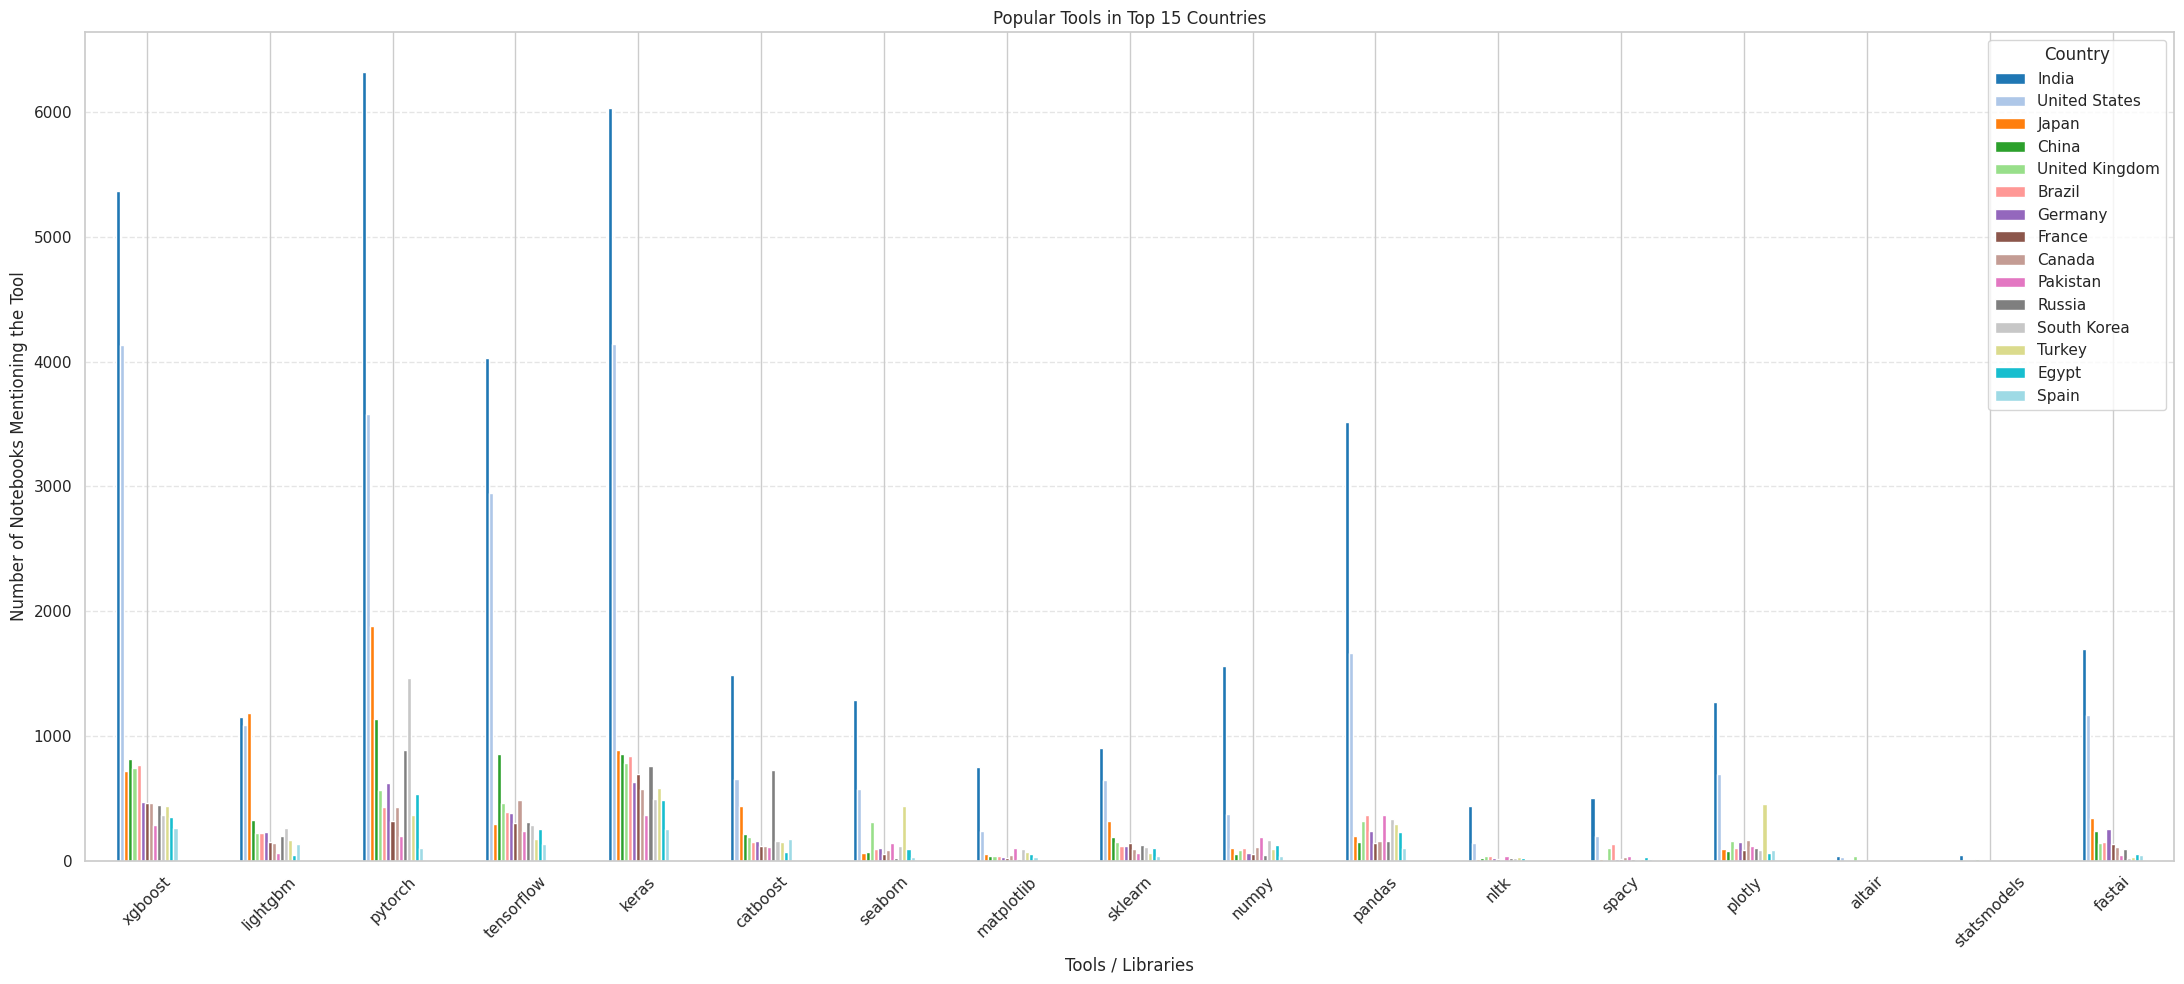

In [33]:
plt.figure(figsize=(22, 10))
tool_usage_plot.plot(kind='bar', figsize=(22, 10), colormap='tab20')

plt.title('Popular Tools in Top 15 Countries')
plt.ylabel('Number of Notebooks Mentioning the Tool')
plt.xlabel('Tools / Libraries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [35]:
# Use only top 15 countries from medal count
top_15_keywords = tool_usage_by_country.loc[top_15_countries]

In [36]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(top_15_keywords)

In [37]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(reduced)

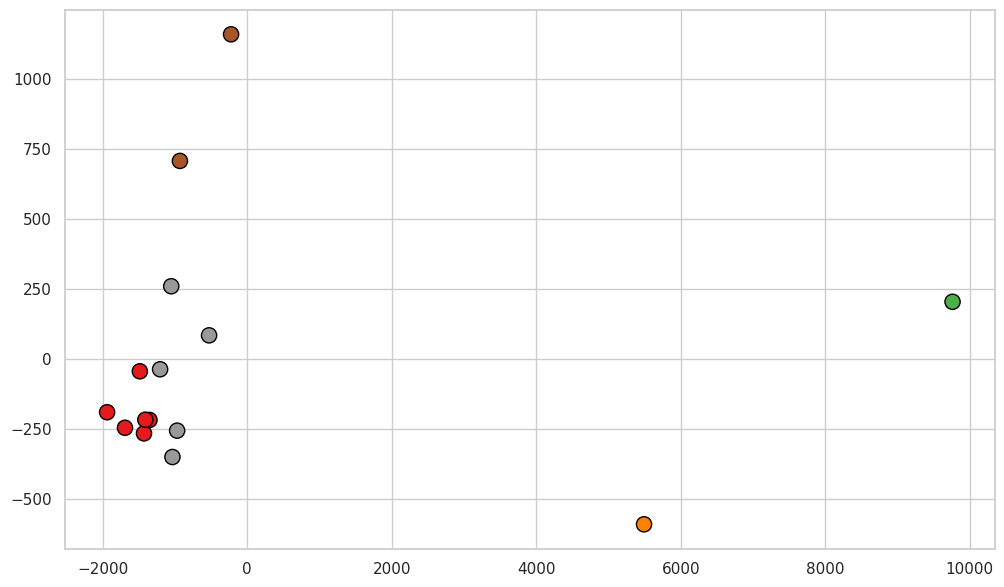

In [38]:
# Visualize the clusters
plt.figure(figsize=(12, 7))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='Set1', s=120, edgecolor='black')

In [42]:
kernels['CleanTitle'] = kernels['CurrentUrlSlug'].astype(str).apply(clean_text)

In [43]:
kernels_with_country = kernels.merge(users[['UserId', 'Country']], left_on='AuthorUserId', right_on='UserId', how='left')

In [44]:
vectorizer = CountVectorizer(max_features=100)
X = vectorizer.fit_transform(kernels_with_country['CleanTitle'])

In [45]:
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
keywords_df['Country'] = kernels_with_country['Country']

<Figure size 1800x700 with 0 Axes>

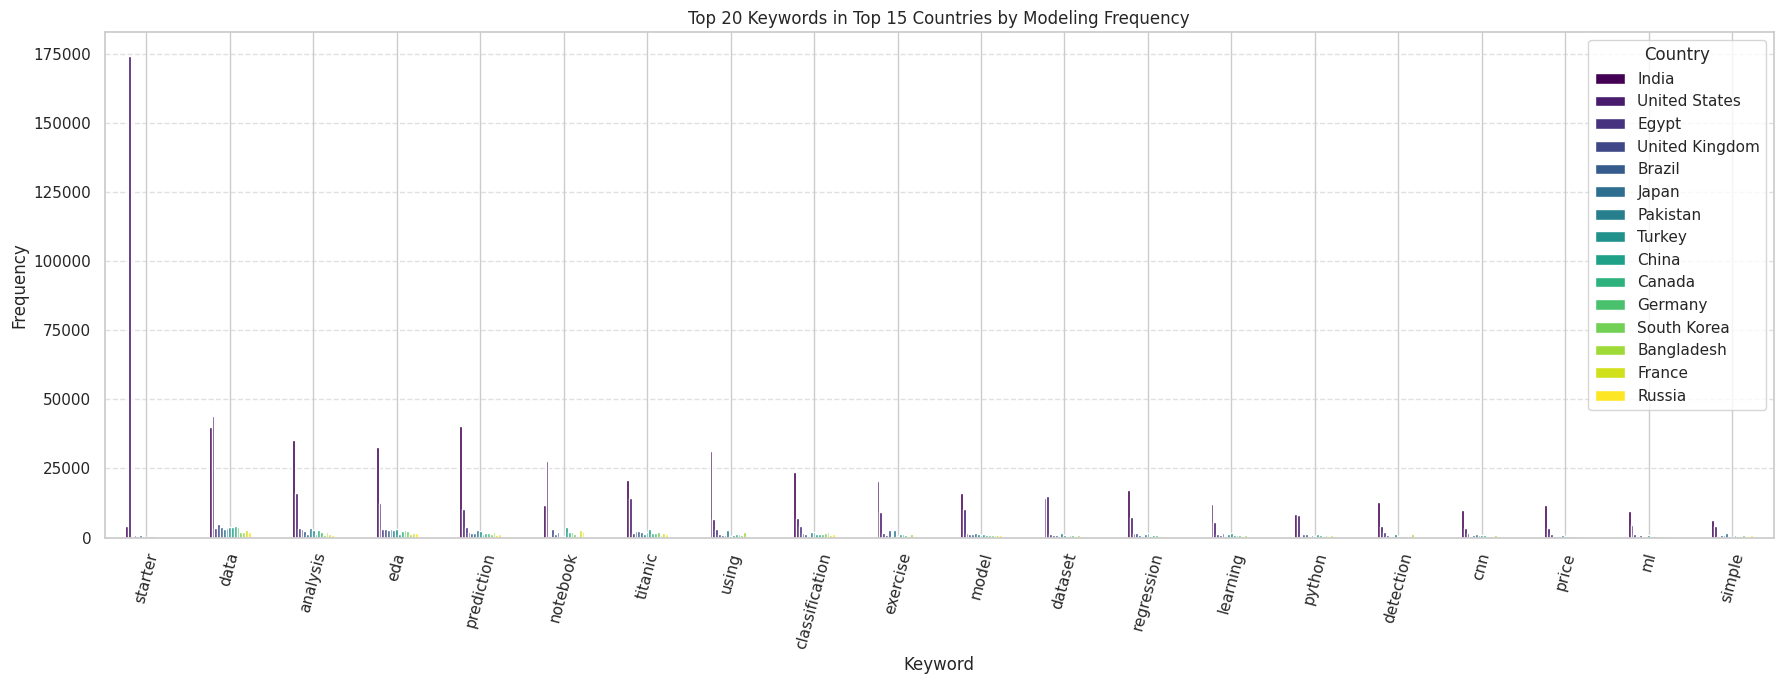

In [46]:
import matplotlib.pyplot as plt

# Step 1: Group and sum keyword frequencies by country
country_keywords = keywords_df.groupby('Country').sum()

# Step 2: Calculate total keyword count per country
country_keywords['TotalKeywordCount'] = country_keywords.sum(axis=1)

# Step 3: Select top 15 countries by total keyword usage
top_countries_df = country_keywords.sort_values('TotalKeywordCount', ascending=False).head(15).drop(columns='TotalKeywordCount')

# Step 4: From those countries, extract total frequency per keyword
top_keywords = top_countries_df.sum(axis=0).sort_values(ascending=False).head(20).index

# Step 5: Filter to keep only those top 20 keywords
filtered_df = top_countries_df[top_keywords]

# Step 6: Transpose for plotting
selected_keywords = filtered_df.T

# Step 7: Plot
plt.figure(figsize=(18, 7))
selected_keywords.plot(kind='bar', figsize=(18, 7), colormap='viridis')

plt.title('Top 20 Keywords in Top 15 Countries by Modeling Frequency')
plt.ylabel('Frequency')
plt.xlabel('Keyword')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Estimate notebook title length (from CurrentUrlSlug)
kernels['NotebookLength'] = kernels['CurrentUrlSlug'].astype(str).apply(lambda x: len(str(x).split('-')) if pd.notnull(x) else 0)

In [ ]:
# Merge with users to get Country
kernels_with_country = kernels.merge(users[['UserId', 'Country']], left_on='AuthorUserId', right_on='UserId', how='left')

In [ ]:
#  Extract Year from CreationDate
kernels_with_country['Year'] = pd.to_datetime(kernels_with_country['CreationDate'], errors='coerce').dt.year

In [ ]:
# Filter to top medal-winning countries
kernels_with_country = kernels_with_country[kernels_with_country['Country'].isin(top_15_countries)]

In [ ]:
# Group by Year & Country and compute average title token count
trend_df = kernels_with_country.groupby(['Year', 'Country'])['NotebookLength'].mean().reset_index()

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_df, x='Year', y='NotebookLength', hue='Country', marker='o', linewidth=2.2)
plt.title('Average Notebook Title Token Count Over Time (Top 15 Countries)', fontsize=14)
plt.ylabel('Title Length (Tokens)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()